<a href="https://colab.research.google.com/github/mfdev-solution/collab_deep_lerning/blob/main/CNN_exemple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Tout d’abord, importons toutes les librairies qui nous serons nécessaires pour la suite

In [20]:
import tensorflow as tf
# from tensorflow.keras.utils import load_img
# from tensorflow.keras.utils import img_to_array
# from tensorflow.keras.applications.vgg16 import  preprocess_input
# from tensorflow.keras.applications.vgg16 import  decode_predictions
# from tensorflow.keras.applications.vgg16 import VGG16
from keras_preprocessing.image import load_img
from keras_preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

>  Entrainement du modèle pré-entrainé VGG16

In [21]:
model = VGG16()

> Importation des 3 images à prédire

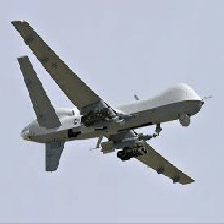

In [45]:
#importation des 3 images suivantes : avion de guerre de typre reaper , loup ,ballon de football
# img1 = load_img('reaper.jpeg',target_size=(224,224))
# img2 = load_img('loup.jpeg',target_size=(224,224))
# img3 = load_img('ballon.jpeg',target_size=(224,224))
img1 = load_img('/content/ballon.jpg', target_size=(224, 224))
img2 = load_img('/content/loup.jpg', target_size=(224, 224))
img3 = load_img('/content/reaper.jpg', target_size=(224, 224))

img3

> Pretraitement des images 

In [46]:
# Conversion image (matrice de pixels ) en un numpy array
def preprocess(image):
  image = img_to_array(image)
  # Redimensionnage 
  image = image.reshape((1,image.shape[0],image.shape[1],image.shape[2]))
  # print((1,image.shape[0],image.shape[1],image.shape[2]))
  # Preprocessing
  image = preprocess_input(image)
  
  return image

> Prediction du model

In [47]:
def pred_modele(image):
  image = preprocess(image)
  #prediction
  y_pred = model.predict(image)
  
  # Conversion des probabilites en classe label
  label = decode_predictions(y_pred)

  # Affectaion du label ayant la plus grande probabilite
  label = label[0][0]

  return ((label[1],label[2]*100))

img = [img1,img2,img3]
for i in range(0,3):
  print("prediction image ",i+1,":",pred_modele(img[i])[0],"avec une probabilite de ",round(pred_modele(img[i])[1],2))

(1, 1, 224, 224)
1/1 [==============================] - 1s 640ms/step
(1, 1, 224, 224)
1/1 [==============================] - 1s 658ms/step
prediction image  1 : soccer_ball avec une probabilite de  99.99
(1, 1, 224, 224)
1/1 [==============================] - 1s 638ms/step
(1, 1, 224, 224)
1/1 [==============================] - 1s 603ms/step
prediction image  2 : timber_wolf avec une probabilite de  96.22
(1, 1, 224, 224)
1/1 [==============================] - 1s 596ms/step
(1, 1, 224, 224)
1/1 [==============================] - 1s 611ms/step
prediction image  3 : warplane avec une probabilite de  46.99


> On peut également afficher les 5 labels jugés les plus probables par VGG16 :

In [56]:
import pandas as pd

img = load_img('/content/reaper.jpg', target_size=(224, 224))
img = preprocess(img)

# Prédiction
y_pred = model.predict(img)

# Création d'un DataFrame avec les 5 labels les plus probables
label_5_plus_probable = decode_predictions(y_pred)

l=[]
m=[]
for i in range(5) :
    l.append(label_5_plus_probable[0][i][1])
    m.append(round(label_5_plus_probable[0][i][2]*100,2))
    
df_5_plus_probable=pd.DataFrame({'Etiquette': l, 'Probabilité (%)' : m},index = list(range(1,6)))
df_5_plus_probable

(1, 1, 224, 224)
1/1 [==============================] - 1s 638ms/step


,Etiquette,Probabilité (%)
1,warplane,46.99
2,wing,20.36
3,space_shuttle,16.58
4,airliner,13.52
5,missile,0.95
